# <span style='font-family:Inter Black'> Machine Learning Notes - Practice

## <span style='font-family:Inter'> Links    
<span style='font-family:Inter Black'> [Imbalanced Data - Tensorflow](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data) 
    
<span style='font-family:Inter Black'> [Overfit Underfit - Tensorflow](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) 

## <span style='font-family:Inter'> Cross Validation


Split the data several times in train-test combinations and evaluate the performance of the algorithm on each test set.


- `Stratified`: same proportion of each class in the various $k$ folds
- `Shuffle`: ensures randomization

___

Let's get some terminology straight, generally when we say **a model** we refer to a particular method for describing how some input data relates to what we are trying to predict. We don't generally refer to particular instances of that method as different models. So you might say 'I have a linear regression model' but you wouldn't call two different sets of the trained coefficients different models. At least not in the context of model selection.

So, when you do K-fold cross validation, you are testing how well your model is able to get trained by some data and then predict data it hasn't seen. We use cross validation for this because if you train using all the data you have, you have none left for testing. You could do this once, say by using 80% of the data to train and 20% to test, but what if the 20% you happened to pick to test happens to contain a bunch of points that are particularly easy (or particularly hard) to predict? We will not have come up with the best estimate possible of the models ability to learn and predict.

We want to use all of the data. So to continue the above example of an 80/20 split, we would do 5-fold cross validation by training the model 5 times on 80% of the data and testing on 20%. We ensure that each data point ends up in the 20% test set exactly once. We've therefore used every data point we have to contribute to an understanding of how well our model performs the task of learning from some data and predicting some new data.

> But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

Now, say we have two models, say a linear regression model and a neural network. How can we say which model is better? We can do K-fold cross-validation and see which one proves better at predicting the test set points. But once we have used cross-validation to select the better performing model, we train that model (whether it be the linear regression or the neural network) on all the data. We don't use the actual model instances we trained during cross-validation for our final predictive model.

Note that there is a technique called bootstrap aggregation (usually shortened to 'bagging') that does in a way use model instances produced in a way similar to cross-validation to build up an ensemble model, but that is an advanced technique beyond the scope of your question here.

## <span style='font-family:Georgia'> Scoring Function vs Loss Function 
    
[Link](https://kiwidamien.github.io/custom-loss-vs-custom-scoring.html)    

    So we only apply the scoring parameter when choosing between models, not when fitting the individual models themselves.

    This can be subtle, so it is worth distinguishing the two concepts:

    Loss: The metric that your fitting method optimizes for a given model with all hyperparameters set.
    Scoring: The metric used to choose between your optimized model (i.e. how you pick the best hyperparameters).
    If you are trying to minimize the MAE, you would ideally want to have MAE as your loss (so each model has the smallest possible MAE, given the hyperparameters) and have MAE as your scoring function (so you pick the best hyperparameters). If you use MSE as your loss, and MAE as your scoring, you are unlikely to find the best answer.

    Scikit-learn makes it very easy to provide your own custom score function, but not to provide your own loss functions. In this Github issue, Andreas Muller has stated that this is not something that Scikit-learn will support. While it is clearly useful, function calls in Python are slow. A loss function can be called thousands of times on a single model to find its parameters (the number of tiems called depends on max_tol and max_iterations parameters to the estimators). A scoring function, on the other hand, is only called once per model to do a final comparison between models.

## <span style='font-family:Georgia'> Loss Functions (Regression)
    
- RMSE (root mean square error)
- RMSLE (root mean square of the log of the error). When the target is subject to **exponential growth**
- MAE (mean of absolute errors) or MedAE (median of absolute errors).
- Exlpained variance
- R squared
    
    
<code>Ridge</code>


## <span style='font-family:Georgia'> Entropy

Entropy is defined as:

$${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log \mathrm {P} (x_{i})}}$$
    

[Nice explanation](https://math.stackexchange.com/questions/331103/intuitive-explanation-of-entropy)
    
    it follows that the entropy of a random variable is its expected surprise, or in other words it measures **how surprised you expect to be on average** after sampling it.[...] Closely related is Shannon's source coding theorem, if you think of −logP(A) as a measure of how many bits you need to tell someone that A happened.
    
    
    
The intuition for entropy is that it is the average number of bits required to represent or transmit an event drawn from the probability distribution for the random variable.
    

With a normal distribution, differential entropy is maximized for a given variance. A Gaussian random variable has the largest entropy amongst all random variables of equal variance, or, alternatively, the maximum entropy distribution under constraints of mean and variance is the Gaussian.[2]: 255 
    
 
## <span style='font-family:Georgia'> Mutual Information
    
$$
{\displaystyle \operatorname {I} (X;Y)=\int _{\mathcal {Y}}\int _{\mathcal {X}}{p_{(X,Y)}(x,y)\log {\left({\frac {p_{(X,Y)}(x,y)}{p_{X}(x)\,p_{Y}(y)}}\right)}}\;dx\,dy,}
$$

    
Link to <span style='font-family:Georgia'> [**Correlation Notebook**](/notebooks/PycharmProjects/Warehouse/StatsAndProbability/Notes/Correlation.ipynb)

## <span style='font-family:Georgia'> Features-to-sample ratio
    
[Here](https://www.quora.com/In-machine-learning-what-is-a-good-ratio-between-features-and-samples#avgbP)

## <span style='font-family:Georgia'> Bias-Variance

[Medium nice article](https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9#:~:text=Proof%20of%20bias%2Dvariance%20decomposition&text=(1)%20is%20because%20y%20%3D,the%20product%20of%20their%20expectations.)


Definition:

$${\displaystyle \operatorname {E}{\Big [}{\big (}y-{\hat {f}}(x){\big )}^{2}{\Big ]}={\Big (}\operatorname {Bias}{\big [}{\hat {f}}(x){\big ]}{\Big )}^{2}+\operatorname {Var}{\big [}{\hat {f}}(x){\big ]}+\sigma ^{2}}$$

where 

$${\displaystyle \operatorname {Bias}{\big [}{\hat {f}}(x){\big ]}=\operatorname {E} {\big [}{\hat {f}}(x){\big ]}-f(x)}$$

and 

$${\displaystyle \operatorname {Var}{\big [}{\hat {f}}(x){\big ]}=\operatorname {E} [{\big (}\operatorname {E}[{\hat {f}}(x)]-{\hat {f}}(x){\big )}^{2}].}$$

In [1]:
%matplotlib inline

from pathlib import Path
import numpy as np
from numpy.random import choice, normal
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

sns.set_style('white')
np.random.seed(seed=42)
results_path = Path('results', 'random_forest')
if not results_path.exists():
    results_path.mkdir(parents=True)

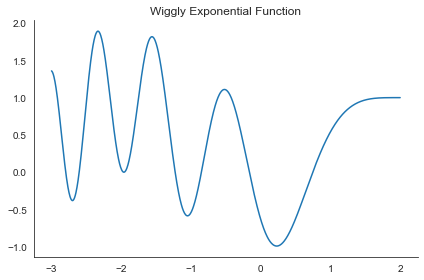

In [2]:
def f(x):
    return np.exp(-(x+2) ** 2) + np.cos((x-2)**2)

x = np.linspace(-3, 2, 1000)
y = pd.Series(f(x), index=x)
y.plot(title='Wiggly Exponential Function')
sns.despine()
plt.tight_layout();

In [4]:
test_size = 500
train_size = 250
reps = 100

noise = .5  # noise relative to std(y)
noise = y.std() * noise

X_test = choice(x, size=test_size, replace=False)

max_depth = 10
n_estimators=10

tree = DecisionTreeRegressor(max_depth=max_depth)
bagged_tree = BaggingRegressor(base_estimator=tree, n_estimators=n_estimators)
learners = {'Decision Tree': tree, 'Bagging Regressor': bagged_tree}

predictions = {k: pd.DataFrame() for k, v in learners.items()}
for i in range(reps):
    X_train = choice(x, train_size)
    y_train = f(X_train) + normal(scale=noise, size=train_size)
    for label, learner in learners.items():
        learner.fit(X=X_train.reshape(-1, 1), y=y_train)
        preds = pd.DataFrame({i: learner.predict(X_test.reshape(-1, 1))}, index=X_test)
        predictions[label] = pd.concat([predictions[label], preds], axis=1)
        
# y only observed with noise
y_true = pd.Series(f(X_test), index=X_test)
y_test = pd.DataFrame(y_true.values.reshape(-1,1) + normal(scale=noise, size=(test_size, reps)), index=X_test)

result = pd.DataFrame()
for label, preds in predictions.items():
    result[(label, 'error')] = preds.sub(y_test, axis=0).pow(2).mean(1)    # mean squared error
    result[(label, 'bias')] = y_true.sub(preds.mean(axis=1), axis=0).pow(2)             # bias
    result[(label, 'variance')] = preds.var(axis=1)
    result[(label, 'noise', )] = y_test.var(axis=1)
result.columns = pd.MultiIndex.from_tuples(result.columns)

df = result.mean().sort_index().loc['Decision Tree']
f"{(df.error- df.drop('error').sum()) / df.error:.2%}"

df = result.mean().sort_index().loc['Bagging Regressor']
f"{(df.error- df.drop('error').sum()) / df.error:.2%}"

'0.25%'

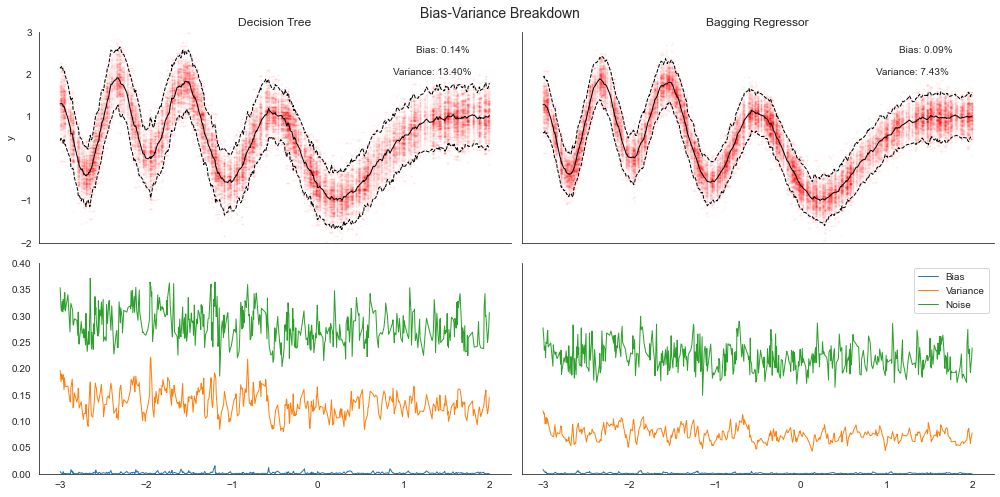

In [5]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14, 7), sharex=True, sharey='row')
axes = axes.flatten()
idx = pd.IndexSlice

for i, (model, data) in enumerate(predictions.items()):
    mean, std = data.mean(1), data.std(1).mul(2)
    (pd.DataFrame([mean.sub(std), mean, mean.add(std)]).T
     .sort_index()
     .plot(style=['k--', 'k-', 'k--'], ax=axes[i], lw=1, legend=False, ylim=(-2, 3)))
    (data.stack().reset_index()
     .rename(columns={'level_0': 'x', 0: 'y'})
     .plot.scatter(x='x', y='y', ax=axes[i], alpha=.02, s=2, color='r', title=model))
    r = result[model]
    m = r.mean()
    kwargs = {'transform': axes[i].transAxes, 'fontsize':10}
    axes[i].text(x=.8, y=.9, s=f'Bias: {m.bias:.2%}', **kwargs)
    axes[i].text(x=.75, y=.8, s=f'Variance: {m.variance:.2%}', **kwargs)
    
    (r.drop('error', axis=1).sort_index()
     .rename(columns=str.capitalize)
     .plot(ax=axes[i+2], lw=1, legend=False, stacked=True, ylim=(0, .4)))

axes[-1].legend(fontsize=10)
fig.suptitle('Bias-Variance Breakdown', fontsize=14)
sns.despine()
fig.tight_layout()
fig.subplots_adjust(top=.93);

## <span style='font-family:Georgia'> Out-of-Bag testing

[Medium Article](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)

### LSTM

[Train Multi variate time series](https://stats.stackexchange.com/questions/305863/how-to-train-lstm-model-on-multiple-time-series-data)

[Train Multi variate time series 2](https://datascience.stackexchange.com/questions/67171/can-i-use-lstm-models-to-evaluate-multiple-independent-time-series)

[AAA](https://stats.stackexchange.com/questions/327324/multi-dimentional-and-multivariate-time-series-forecast-rnn-lstm-keras)



### RL vs LSTM

there is typically an assumption that your state is Markovian. So if you are dealing with a Markov state space, then a recurrent neural network might not be a great fit because there isn't any time series dependencies on the state or results. But the Markov assumption is generally soft and most RL applications aren't technically Markovian, which opens up the potential benefit of RNNs that can model long term time dependencies across a series of states.

Side note: Just in case you aren't familiar with what a Markov state space is. It's essentially when a single state can be used to model all future environment interactions. So for example, a game of Chess has the Markov property. The state of a game of Chess is the orientation of all the pieces, and it doesn't really matter what the state was 3 turns ago, because the current state is all you need to know. But, on the other hand, a game of Poker does not necessarily have the Markov property for it's states, because there are unknowns in what cards are available. So know what cards were played 3 turns ago could be useful in determining what might happen in the future. So a RNN might do better here since it can 'remember' previous states and use those to make future assumptions.

### How to Find a Probability Distribution 

Find the survival function > find the cumulative > differentiate!

Example on the uniform: https://stats.stackexchange.com/questions/373121/biasedness-of-uniform-distribution-mle

### Curse of Dimensionality

- The more features, the higher risk of overfitting is the curse of dimensionality in a nut shell.
- The blessing of non-uniformity counteracts the curse of dimensionality in most practical scenarios.
- Dimensionality reduction can be a tool to remedy the curse of dimensionality.


<div class="alert alert-info">

**Bagging** is a simple ensembling technique in which we build many *independent* predictors/models/learners and combine them using some model averaging techniques. (e.g. weighted average, majority vote or normal average)

**Boosting** is an ensemble technique in which the predictors are not made independently, but sequentially.
</div>

### Gradient Boosting

*Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.* It is a SEQUENTIAL (boosting) technique. 

https://shirinsplayground.netlify.com/2018/11/ml_basics_gbm/

https://www.youtube.com/watch?v=jxuNLH5dXCs&t=420s

# Artificial Neural Network

- [**1. Coursera**](#Coursera)
- [**6. End**](#End)
- [**2. Mechanism**](#Mechanism)
- [**3. Notes**](#Notes)
- [**4. Results**](#Results)
- [**5. Questions**](#Questions)
- [**7. Mifid**](#Mifid)



${\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}}$

s

#### Metrics

- Accuracy: number of correct predictions on total predictions
- Precision =  $TP / (TP + FP)$
- Recall = Sensitivity = $TP / (TP + FN)$
- Specificity = $TN / (TN + FP)$
- Logloss = 

#### Entropy

Entropy is defined as: $ S = \mathrm{} \sum p_i \ln p_i $. 

#### Cross Validation

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique 
   1. Take the group as a hold out or test data set
   2. Take the remaining groups as a training data set
   3. Fit a model on the training set and evaluate it on the test set
   4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Cross validation -  for time series, problem of look ahead bias

#### LSTM

rf: for continuous prediction

NN: memory gate for LSTM

NN: RNN functioning 

logloss 

nlp stemming stop word removal

penalized regression, ridge or lasso

PCA and SVD (zero mean)

Support Vectro machine (C parameter)

Ridge vs Lasso Regression (with regulizers)



#### Hierarchical clustering

- Agglomerative

- Divisive 

aggregate iteratively the closest clusters (based on the Euclidean distance cluster definition, e.g. centroids distance or minimum distance); **dendogram **represents the memory of the clustering. Each aggregation is recorder on the dendogram. The horizontal lines are the entries, while the vertical axes are the euclidean distances

#### K-means clustering

- choose the number of clusters k
- select at random k centroids
- assign each point to the closest centroid 
- compute and place the new centroid
- reassign

> K-means clustering **is not a classification tool**, thus analyzing accuracy is not a very good idea. You can do this, but this is not what k-means is for. It is supposed to find a grouping of data which maximizes between-clusters distances, **it does not use your labeling to train**. Consequently, things like k-means are usually tested with things like RandIndex and other clustering metrics. For maximization of accuracy you should fit actual classifier, like kNN, logistic regression, SVM, etc.

in sklearn, for clustering algoritms, `y` keyword in `fit` and `fit_predict` are ignored. 



#### Train Test Split

The first step is to divide the peer group data in train/test set. We will use the keyword "stratify" in order to maintain  the same proportion of "1" label in the train and in the test set. (see below) 



```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

y = pd.Series(np.random.choice([0, 1], size=1000, p=[0.95, 0.05]))
X = pd.DataFrame(np.random.randn(1000, 10))

# with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print('y train "1" label proportion with stratify: ' + str(round(y_train.values.tolist().count(1) / len(y_train), 3)))
print('y test "1" label proportion with stratify: ' + str(round(y_test.values.tolist().count(1) / len(y_test), 3)))

"""
>>> y train "1" label proportion with stratify: 0.042
>>> y test "1" label proportion with stratify: 0.042
"""

# without stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print('y train "1" label proportion, no stratify: ' + str(round(y_train.values.tolist().count(1) / len(y_train), 3)))
print('y test "1" label proportion, no stratify: ' + str(round(y_test.values.tolist().count(1) / len(y_test), 3)))

"""
>>> y train "1" label proportion, no stratify: 0.046
>>> y test "1" label proportion, no stratify: 0.033
"""

```

#### Hyper Parameters Tuning

The dictionary of parameters in the random forest is made up by the following parameters: 

```python
{'max_depth': 10, 
'warm_start': False, 
'bootstrap': True, 
'random_state': None, 
'n_estimators': 50, 
'min_samples_split': 2, 
'min_impurity_decrease': 0.0, 
'min_samples_leaf': 10, 
'max_leaf_nodes': None, 
'min_weight_fraction_leaf': 0.0, 
'oob_score': False,
'class_weight': None, 
'criterion': 'gini',
'max_features': 'auto',
'verbose': 0,
'min_impurity_split': None,
'n_jobs': 1}
```

#### Cost Function 

The ```average_precision``` will be passed in the ```scoring``` attribute, which refers to the ```metrics.average_precision_score``` function. First of all, the score methodology should be coherent with what we need throughout our analysis, i.e. something similar to the **precision rate**, defined as: 

$P = \frac{T_p}{T_p+F_p}\tag{1}$

That is, the ratio of the $true\_positives$ and the sum of $true\_positives$ $false\_positives$. However, in our case  this definition isn't still restrictive enough, since we are not really interested in finding *all* the funds that will be in the first quartile in the next year. Hence, in the ```RandomizedSearchCV```, a custom precision function will be passed, in order to train the model to be more selective. During the model training, ```my_custom_accuracy_func``` sorts the funds for their probability of being in the first quartile and takes the first $10\%$ of these funds;  On these, the precision score as defined in $(1)$ is calculated.

After the model has been trained, we have to calculate the accuracy on the *test set*.  In this computation, ```my_custom_accuracy_func``` adds a correction which depends on the *binomial confidence interval*, defined as follows: 

${\displaystyle {\frac {{\hat {p}}+{\frac {z^{2}}{2n}}}{1+{\frac {z^{2}}{n}}}}\pm {\frac {z}{1+{\frac {z^{2}}{n}}}}{\sqrt {{\frac {{\hat {p}}(1-{\hat {p}})}{n}}+{\frac {z^{2}}{4n^{2}}}}}} \tag{2}$

This is called the **"Wilson" method**, and it is a more accurate estimate of the binomial confidence interval compared to the normal approximation (important especially if the number of samples is low or if the the probabilities of success are extreme). Intuitively, the center value of this interval is the weighted average of ${\displaystyle {\hat {p}}}$ and $1/2$, with ${\displaystyle {\hat {p}}}$ receiving greater weight as the sample size increases. Then, the accuracy metric is adjusted in the following way (only if the $25\%$ threshold is included in the lower confidence band: 

${\displaystyle Acc_{adj} = \max\bigg({Acc* {\frac {Acc - 25\%}{|CI|}}}}; 0\bigg)\tag{3}$



```python
def my_custom_accuracy_func(y, y_pred_prob, cut_at=0.1, quantile=0.95, final_score=False):
    1_quar_pred = pd.Series(y_pred_prob[:, 1])
    sorted_prob = 			  			1_quart_pred.sort_values(ascending=False)
    up_to =                                                sorted_prob.iloc[:max(1,round(len(sorted_prob.index) * cut_at))].values[-1]
    y_pred = (first_quartile_pred > up_to)
    metric = precision_score(y, y_pred)

    if final_score:
        cm = confusion_matrix(y, y_pred)
        z = sp.stats.norm.ppf(quantile)
        tot_number_of_funds = sum(sum(cm))
        tot_positive = sum(cm)[1]
        n = sum(cm[:, 1])
        conf_int = z * np.sqrt((metric * (1 - metric)) / n)
        metric_adj = metric

        if (metric - conf_int) < 0.25:  
            metric_adj = metric * ((metric - 0.25) /   conf_int)

        return metric, metric_adj, tot_number_of_funds, tot_positive

    else:
        return metric
```

`randsearch.best_score_` is the mean score for test folds over training data, so will not match when you use full data to calculate score. 

```python
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split}
```

#### Cross Validation

There are multiple things to note here.

1) `randsearch.best_score_` is the mean score for test folds over training data, so will not match when you use full data to calculate score.

2) The **RandomizedSearchCV** will be **trained on (fitted) whole data after finding the best combination of params** (The combination of params which produced the `best_score_`). So when you score on the same data, it is expected to give higher results (this means that if I have an overfitting model, e.g. a Random Forest very high maximum depth, the score on the fully fitted data set will be extremely high)

3) When you specify `scoring='average_precision'`, internally its converted to the following

								      * * *

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”. A model is trained using $k-1$ of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as  accuracy. The performance measure reported by k-fold cross-validation is then the **average** of the values computed in the loop.

In our case, cross validation is performed through he ```StratifiedShuffleSplit``` function. Applying the ```StratifiedShuffleSplit``` is a way of performing **K-fold cross validation**; "Shuffle" means that, unlike traditional K-fold cross validation, the split is not made in order to cover all the dataset, but it is done randomly. "Stratified" means that the split aims at preserving the percentage of samples for each class. 

								      * * *

Introduced the precision score based on the precision measure and scaled by the number of funds

The constructor for the **KerasClassifier** class can take default arguments that are passed on to the calls to **model.fit()**, such as the number of epochs and the batch size.

For example:

```python
def create_model():
	...
	return model

model = KerasClassifier(build_fn=create_model)
```

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

For example:


def create_model():
​	...
​	return model

model = KerasClassifier(build_fn=create_model, epochs=10)
1
2
3
4
5
def create_model():
​	...
​	return model

model = KerasClassifier(build_fn=create_model, epochs=10)
The constructor for the KerasClassifier class can also take new arguments that can be passed to your custom create_model() function. These new arguments must also be defined in the signature of your create_model() function with default parameters.

For example:


def create_model(dropout_rate=0.0):
​	...
​	return model

model = KerasClassifier(build_fn=create_model, dropout_rate=0.2)
1
2
3
4
5
def create_model(dropout_rate=0.0):
​	...
​	return model

model = KerasClassifier(build_fn=create_model, dropout_rate=0.2)

The constructor for the **KerasClassifier** class can also take new arguments that can be passed to your custom **create_model()** function. These new arguments must also be defined in the signature of your **create_model()** function with default parameters.

For example:

| 12345 | def create_model(dropout_rate=0.0):	...	return model model = KerasClassifier(build_fn=create_model, dropout_rate=0.2) |
| ----- | ------------------------------------------------------------ |
|       |                                                              |

# Coursera

### Logistic Regression for binary classification 

Imagine to have $m$ pictures, and that you want to classify them as being or not a cat. You start with your train set. In our train set we have $m$ columns, with $n\_x$ rows, where each row is a pixel. The $X$ matrix has then shape $(n\_x, m)$. Since usually, in the case of an image, one single image is not a single vector, the `np.reshape` function *unrolls* the array into a vector. A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (bcd, a) is to use: 

```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

**Mathematical expression of the algorithm**: For one example $x^{(i)}$:

$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

We don't use the 'normal' loss function because of those local minima problems. It makes sense to use this cost fucntion. Try to imagine $y=1$: in this case, the second part of the cost function is equal to $0$, and the first part is minimum for $\hat{y}=1$; the closer $\hat{y}$ to zero, the more the cost function will increase. Cost function translartes how precise you are doing on the entire training set (it is defined as the sum of the loss functions). Once you have the cost function, you apply yhe gradient descend to it. 

### Gradient Descend
The gradient descend allows to update the weights going down in the cost function. The weights are updated subtracting from the current weight the learning rate times the partial derivative of the cost function with respect to the weights.

$$w := w - \alpha {\frac  {dJ(w)}{dw}}$$ 

Where $\alpha$ is the learning rate, i.e. the "speed" with which the gradient descend updates the weights. It means that we subtract from the current weight a portion of the quantity by which the cost function changes given a change in the weights. This goes in the direction of minimizing the cost function; indeed, if the derivative is positive, I will lower the weight, moving downward the cost function (and *vice versa*). Of course, computing this derivative is not straightfrward. The calculation is performed through a rule called chain rule. It shows that$${\frac  {dz}{dx}}={\frac  {dz}{dy}}\cdot {\frac  {dy}{dx}}$$Or, in a different notation$$D[f(g(x))]=f'(g(x))\cdot g'(x)$$

The gradient descend is computed in the following way:

<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\Utente\Desktop\Coursera - Machine Learning\Week2\6.png" width="600">


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$


$$dz = a - y$$

The last step of the neural network (or of the logistic regression) is usually a boolean. In this case, the last node activation function will usually be a sigmoid function. This function will be the first derivative to take when performing gradient descend. In order to compute the  gradient to optimize loss functions using backpropagation, we should use the following formula: $$sigmoidderivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))$$

### Shallow Neural Networks

They are defined as neural networks with just one or two layers. Hyperbolic tangent function almost always works better than the sigmoid (only a shifted version of sigmoid). In this way you are "centering" your data, making learning much faster (it is **strictly superior** to the sigmoid according to Andrew Ng). It is defined as follows 

$${\displaystyle {\frac {e^{2x}-1}{e^{2x}+1}}={\frac {1-e^{-2x}}{1+e^{-2x}}}.}$$

For both functions though, when you are far away from the center, the gradient gets so close to zero, and this can slow down gradient descend. For this reason usually the **Relu function** is used, and it is simply defined as $$f(x)=\max(0,x)$$An alternative form of the Relu is the so-called leaky Relu, where the negative part has a slightly negative slope. 

But the question is: why using activation functions at allows (or linear activation function)? It turns out it is totally useless, except for linear regression problems.  

If we initialize the weights as 0 for every weight, all the weight will change by the same amount (cuz all the hidden unit are computing the same function)

#### Parameters
- Weight and bias vector

#### Hyperparameters
- Learning Rate
- Number of iterations
- Number of hidden units
- Activation function
- Momentum
- Minibatch size

#### Train Development and Test
Train &rarr; Development (hold out cross validation) &rarr; Test; all the sets should come from the same distribution.

#### Bias Variance
In the first ML era, Bias and Variances were opposed in a trade off, but now, increasing number of data or increasing NN size, we can bring bias or variance down without being detrimental to the other side (not a bias anymore)
- Train set error and Test set error high, you are probably underfitting (high bias). *Solution*: bigger network or train for longer
- Train set error << of Test set error, you are probably overfitting (high variance). *Solution*: More data or regularization

#### L2 Regularization
L1 and L2 regularization &rarr; inserting a weight "correction" that reduces weights ('weight decay'), such as: 

$${\displaystyle \min \_{f}\sum \_{i=1}^{n}V(f(x\_{i}),y\_{i})+\lambda R(f)}$$

**Intuition I**: if you push lambda higher, the gradient descend will be "incentivized" to put much of the weights close to zero, i.e. reducing to very close to zero the weight of many hidden units. **Intuition II**: if weights are small, also the $z$ will be verty small, so they will move in the activation function where the slope is higher.

"Frobenius Norm"

#### Dropout Regularization
Dropping some nodes randomly with probability p, but then deviding $a$ by p to preserve the expected value. Is it dropping units each cycle?

#### Other Methods
Early Stopping

Orthogonalization: think about two tasks at the time


#### Normalizing Inputs
Without normalizing, if the input features range on very different scales, the cost function can look like much more "long and thin", and it can be more difficult to optimize. 

Gradients can Explode or Vanish with 


Implement the following function to initialize all parameters to zeros. You'll see later that this does not work well since it fails to "break symmetry"

- The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
- It is however okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. 

In the excercise, same "zero" prediction.


**In summary**:
- Initializing weights to very large random values does not work well. 
- Hopefully intializing with small random values does better. The important question is: how small should be these random values be? Lets find out in the next part! 


In the excercise, same "zero" prediction.

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. 

<font color='blue'>
**What you should remember** -- the implications of L2-regularization on:
- The cost computation:
    - A regularization term is added to the cost
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.

At each iteration, you shut down (= set to zero) each neuron of a layer with probability  1−keep_prob1−keep_prob  or keep it with probability  keep_probkeep_prob  (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration.

**What you should remember about dropout:**
- Dropout is a regularization technique.
- You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
- Apply dropout both during forward and backward propagation.
- During training time, divide each dropout layer by keep_prob to keep the same expected value for the activations. For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. Dividing by 0.5 is equivalent to multiplying by 2. Hence, the output now has the same expected value. You can check that this works even when keep_prob is other values than 0.5.  
  </font>


#### Optimization
Mini batch (run $n$ training example at a time): cost function is trending downwards but in a noisy way; in the batch GD it sould be monotonically decreasing. If mini batch $= 1$, we are talking about stochastic gradient descend. Which is the fastest? way in between: stocastich gradient descend is slow cuz all the benefits of vectorization are lost. Batch is slow because you do all at the same time. With small training set tough, **use batch gradiend descend**. If you use mini-batch, the size of the batch is suggested to be $2^{n}$.

#### EWMA
You can use:
1. EWMA for momentum 
2. RMSPprop
3. Adam (combining the previpus two)


A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent where each mini-batch has just 1 example. The update rule that you have just implemented does not change. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples below illustrate the difference between stochastic gradient descent and (batch) gradient descent. 

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost = compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost = compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

**update il gradiente -> con il beta * il gradiente  ptrecedente (storato da prima) + 1 - beta per il graduiente attuale**

<font color='blue'>
**What you should remember**:
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.
- You have to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$.
  </font>


Why it make sense in the Batch gradient descend?

#### Batch Normalization 
(usually applied for *mini-batches*): normalize the $z$s (only with the data in the mini-batch), then multiply by $\gamma$ and $\beta$, to have fixed mean and variance. Why does it work? Slight regularization effect (like dropout, reduce overfitting **slightly**) and more stable input base (?). At test time, mean and variance are the EWMA of the various mean and variance during learning. 


#### Softmax
When you have not a boolean as $y$, but more than two options; In contrast to "hardmax", where you assign $1$ to the highest value and zero to the other ones. In the softmax case, you take the $y$ vector and rescale it to sum to $1$. 

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

#### Orthogonalizatin
Structure the algo in a way that tuning one hyperparameter doesn't affect the others


So if classifier A has 95% precision, this means that when classifier A says something is a cat, there's a 95% chance it really is a cat. And recall is, of all the images that really are cats, what percentage were correctly recognized by your classifier? So what percentage of actual cats, Are correctly recognized? 

$F1$ score to combine precision and recall (it is the *Harmonic mean*)

Satisficing +  Optimizing

- **Place the target**: increasing the weight in the evaluation metric for stuff you really don't want (e.g. 4th quartile fudns)
- **Aim at the target**: Worry separately about how to actually do well on this metric. e.g. modifying your cost function

Avoidable bias: delta vetween human level performance and training error

Put in the dev/train test your "target" distribution

How to analyse bias and variance? If train and dev come from different distributions, train error can be smaller than dev error, without drawing a conclusion about the variance. 


## Convolutional Neural Network 

### General 
Problem with very large images: too much, data, bln parameters > Solution: CNN. First layers are detecting edges. It seems reasonable to detect first vertical edges, then horizontal. The dimension of height and width of the images in the input are: 
$$n\_{H}^{[l-1]} \times n\_{L}^{[l-1]} \times n\_{C}^{[l-1]} $$

Where $C$ is the number of channels. The output is:
$$n\_{H}^{[l]} \times n\_{L}^{[l]} \times n\_{C}^{[l]} $$

Where the relationship between the inpit and output dimension is given by: 
$$n^{[l]} = \lfloor (n + 2* padding - filter_size)) / s + 1 \rfloor$$

**Type of CNNs**: 
-Classic NN: LeNet, ALexNet, VGG
-Resnet NN
-Inception NN

**Transfer Learning**: train on othe people's weights. Freezw all the parameters already built from others, anche make the NN train only on the output (softmax) parameter. 

**Data  Agumentation**: mirroring, random cropping, rotation, shearing, local warping

A lot of data: low hand-engeneering
Few data: high hand-engeneering / hacking

### Object Detection
Neural Network outputing four other variables, $b\_x$, $b\_y$, $b\_h$, $b\_w$, that define the box you wanna put around the object; $b\_x$ and $b\_y$ parametrize the centre of the box. Assume that 3 classes other than the *bakground class* are to be found; $y$ will be $[p\_c, b\_x, b\_y, b\_h, b\_w, c\_1, c\_2, c\_3]$, where $c$ will identify the class. Loss function will be built on that $y$, only if $p_c$ is equal to one, otherwise, only $p\_c = 0$ will be involved in the cost computation.  

**Landmark detection**: the outputs are the relevant point in the face for instance;

**Sliding Window**: slide one box, then slide a slightly larger box on all the picture, then again and again. At some point, there should be a 1 indicating the presence of a car. But there is **a big computational cost**. Yellow stripes in the test set! Because in sliding windows, you crop the images to train your dataset

**Intersection Over Union (IoU)**: size of the intersection / size of the union. It is a way of checking how algo is working, the threshold being usually 0.5. 

**Anchor Boxes**: way to determine overlapping boxes

### Spatial Invariance of CNN
Spatial invariance comes from the convolutional layers. That in fact is the point of using convolutional filters. A convolutional filter takes in an image, calculates a moving average of the pixel values, and uses that value for a single pixel in the feature map it is creating.

Consider the problem of classifying pictures of human faces based on whether the person is smiling or not. One area of interest here is the mouth. The shape of the mouth can tell if the person is smiling or not. But the mouth is only a small part of the image of a face. The mouth can also be at slightly different locations in the picture. Some people have very little space between their chin and their mouth. Others have a large separation. People could be tilting their faces.

This is where the idea of a convolutional filter is useful. It moves across the picture and keeps calculating a weighted average of the pixel values at different locations. The weights used in the filter - the weights of the moving average are assigned random values at the beginning. During training, the weights are slowly adjusted whenever a wrong classification is made. At the end of the training, one of the filters will have the weights to distinguish a mouth that “laughs” from one that is not.

For example, the output of the filter could be a large number when the mouth is laughing and a small number when the mouth is not laughing.

Because the filter is moving across the picture, it manages to do this regardless of the position of the mouth in the picture. This is where the spatial invariance comes from.

The fully connected layers function as a neural network that takes in a vector consisting of many numbers each of which coms from a different filter, or sequence of filters.

The last two fully connected layers have not only the information about the mouth, but for example, the information about the eyes - are the eyes laughing or not?

The neural network at the last two layers uses the numbers (features) extracted by the convolutional layers and makes a final decision as to whether the person is laughing or not.

### Face Recognition
Face Verification vs Face Recognition (which is much harder). **1 Shot Learning**: $d(img1, img2)$ measures the degree of difference between two images. **Verificication**: If $d(img1, img2) > \tau$, it is a different person. **Siamese Network**: norm of the difference of the encoding of input image $x\_1$ and encoding of input image $x\_2$. **Triplete Loss function**: choose an Anchor, a Positive and a Negative and train the difference of $(A - P + \alpha)$ to be $<=$ of $(A - N)$ ($\alpha$ is in order to avoid trivial soluition); use similar pictures. Alternative: use standard CNN.  

### Neural Style Transfer
Apply Style (S) to Content Image (C) and create Generated image (G). Set $J(G)$ that measures how good is the generated image and use GD to minimize it. Compute the **style matrix**. You have to pick one particular hidden layer to use.

## Sequence Model

**Notation**: $X^{(i)\langle t \rangle}$: where $i$ is the $i$th example (i.e. among the inputs) and $t$ is the $t$th element of the sequence. For $Y$ the same notation applies. $T\_{x}^{(i)}$ and $T\_{y}^{(i)}$ represent the lenght of the input and output sequence respectively (they can be different and they vary across different examples, that's what $i$ stands for). 

Each input $x^{\langle t \rangle}$ is passed through a "layer" to get $y$. This layer will be also an input of the next $x^{\langle t+1 \rangle}$. The network shares parameters $W\_{ax}$,  $W\_{ay}$ and $W\_{aa}$. Basic RNN only uses info on the "left" of the sequence. 


<a name="End"></a>



<a name="Mechanism"></a>
## Mechanism

Input X. Each X is weighted inside a single neuron/unit, then they are added up together $\sum \_{i=1}^{n}{x\_{i}w\_{i}}$ (simple weighted sum). Then, this weighted sum is "passed through" an activation function (relu, etc.).



<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 21%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningI.png" width="500">
_____________________________________________________________________________________________

After that, the [**activation function**](#activationf) activation is implemented, that changes the way the input is transformed and passed into the next neuron. Below the case for the sigmoid is shown, where on the x axis there is the weighted sum obtain previously: 

$${\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.}$$
_____________________________________________________________________________________________

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningII.png" width="700">
_____________________________________________________________________________________________

This is how it looks in a complete form with a single hidden layer. The same applies if other $n$ layers are added, and for each layer a different activation function can be introduced.  
_____________________________________________________________________________________________

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningIII.png" width="700">
_____________________________________________________________________________________________

In the next image is shown how the neural network works with a single node and a single row. The weighted sum passes through the activation function, generating a ${\hat {\boldsymbol {y }}}$. This estimated ${\hat {\boldsymbol {y}}}$ is compared with the true ${\boldsymbol {y }}$; The difference between this two passes through a [**cost function**](#costf), that is the function ought to be minimized by the algorithm. 
_____________________________________________________________________________________________

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningIV.png" width="700">
_____________________________________________________________________________________________

This is what is done for many rows. Given the weights, every row is evaluated and y hat is estimated. The differences between actual and "predicted" values is then added up together by the cost function. The weights are then tweaked (via back propagation) in order to **minimize** the cost function. How these weights are adjusted? If you try all the possible combination of weights in a brute force manner, you will fall under the **curse of dimensionality**. Solution is [**Gradient Descend / Stochastic Gradient Descend**](#costf)
_____________________________________________________________________________________________

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningV.png" width="700">
_____________________________________________________________________________________________

<a name="Notes"></a>

## Notes 

#### Dataset Preprocessing

- **Feature Scaling**: since the machine learning algo is often based on the Euclidean distance, defined as: $$d=\sqrt{\sum_{i=1}^n (q\_i-p\_i)^2}$$ Since sometimes data can have different scales, to avoid the higher-scale data to have an enourmous impact on the distance, it is compulsory to normalize these values. Even if Euclidean distance is not employed in the algorithm, we need scaling in order for the algorithm to **converge faster**. Generally, **StandardScaler** is the module used for scaling, from ScikitLearn. Scaling is broadly defined as: $$z={x-\mu  \over \sigma }$$ where $\mu$ is the mean of the sample and $\sigma$ is the standard deviation of the sample. To avoid the outliers, before being scaled, the random variable could be passed through an hyperbolic tangent function, defined as: $${\tanh x =\displaystyle ={\frac {e^{2x}-1}{e^{2x}+1}}={\frac {1-e^{-2x}}{1+e^{-2x}}}.}$$ It is simply a function that smooths the tails of the distributiuon. The Scikit Learn module provides a utility class that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. Hence, on the train set, fit and transform; on the test set, transform only, using mean and variance of the previous fit. In any case, various scalers can be applied. Question: *do we need to apply feature scaling also to the y variable?* Only when we have to do a regression, or when the y variuables as a big range of values (when it is not a dummy). Here is a nice [primer](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py) on how to scale data. Here some results on our funds metrics, scaled only with standard scaling. Other scaling procedures in the appendix.

<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 3%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_0.png" width="1000">

___

<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 3%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_1.png" width="1000">

- **Missing Values**: the best practice is to fill the missing values with the average value of the column. 	
```python
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
# in this way, fill the NaN with the mean value of the columns, same as doing as...

if fill_na_with_the_average:
    returns_per_period = returns_per_period.fillna(returns_per_period.mean())

# ...this is what is currently implemented in the fund_ranking  
```

- **Dealing With Overlapping Data**: (*try to generate a montecarlo routine to study the effects of data overlapping*).

<a name="activationf"></a>
#### Activation Function

You can use different activation functions for the hidden layer and for the output layer. In the example, __Rectifier__ for the hidden layer and __Sigmoid__ for the output layer. The sigmoid function is defined as below:

$${\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}.}$$

It is easily shown that 

$$\lim \_{x\to \infty}S(x)=1$$ 

and 

$$\lim \_{x\to -\infty}S(x)=0$$

Teh sigmoid function is particularly important in logistic regressions.

This [paper](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=8111D65E546ED94299D3B14F698169E1?doi=10.1.1.208.6449&rep=rep1&type=pdf) shows how the rectifier function is usually a good choice of cost function. If you have to make a binary choice and you have to choose an activation function (last layer), you don't need to go through the complexity of softmax to decide, you can simply use a sigmoid (Should I put 4 output numbers, i.e.  or just one). Probably for us, if the output is binary (1 = first quartile, 0 = 2nd, 3rd or 4th quartile), the right last activation fucntion is a sigmoid >> it gives intuitively the probability of being in the first quartile.   


#### Dataset Split

Scikit Learn: train_test_split. When evaluating different settings (“hyperparameters”) for estimators, there is still risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called **“validation set”**: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”: A model is trained using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy). The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set)

<a name="costf"></a>
#### Cost function 
How is the cost function defined? ${\hat{y}}$ vs $y$. The goal is to **minimize** this difference. Various cost functions in this [link](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications). One of the main functions through which the cost function is minimized is **gradient descend**. Basically it consists in going downwards the cost function via derivation. **Stochastic gradient discend** intervenes when the cost function is not convex, i.e. there are many local minima; in this case let the starting point to be stochastic, then applies the gradient discend. In this case, we look each row one by one, and update weights at every row iteration. In this case you avoid the finding of local minima; Why? Fluctations are much wider (across the cost function), so is much more unlikely that the weigths are "stuck" in a local minima.  

<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\MachineLearningVI.png"  width="600">

See also [A Neural Network in 13 lines of Python (Part 2 - Gradient Descent)](https://iamtrask.github.io/2015/07/27/python-network-part2/) or this other [link](http://neuralnetworksanddeeplearning.com/chap2.

#### Back Propagation
The weights are updated according to *how much* each weight is responsible for the error. The learning rate decide how much we should update the weights.   


#### Hidden Layers
Tuning the hidden layer is "art", no rule of thumbs (in general, average of input and output nodes)
Step function is not working with gradient descend (no gradient). "Leaky ReLU" better convergence (small slope in the negative part), if you are not concenrned that much with efficiency. 


#### Overfitting
**Methods to [avoid overfitting](http://www.kdnuggets.com/2015/04/preventing-overfitting-neural-networks.html)**; *Dropout* is a method for preventing overfitting that can often be used in lieu of other techniques. While training, dropout is implemented by only keeping a neuron active with some probability p (a hyperparameter), or setting it to zero otherwise. Intuitively, this forces the network to be accurate even in the absence of certain information. It prevents the network from becoming too dependent on any one (or any small combination) of neurons. Expressed more mathematically, it prevents overfitting by providing a way of approximately combining exponentially many different neural network architectures efficiently. The process of dropout is expressed pictorially in the figure below.

- **Bias variance trade off**: over vs under fitting; variance is scattering around correct answer, bias is distance from correct answer >> make various buckets to test your training

- **Bias Vector**: 

#### Cross Validation
**Scikit Learn [link](http://scikit-learn.org/stable/modules/cross_validation.html)**;

- Dummy Variable Trap: The dummy variable trap is concerned with cases where a set of dummy variables is so highly collinear with each other that OLS cannot identify the parameters of the model. That happens mainly if you include all dummies from a certain variable, e.g. you have 3 dummies for education "no degree", "high school", and "college". If you include all dummies in the regression together with an intercept (a vector of ones), then this set of dummies will be linearly dependent with the intercept and OLS cannot solve. For this reason dummies are automatically dropped by most statistical packages.


Input variables can be the [ cost / perf / risk / other ] or the single tools (can be interesting to spot the differences between these two approaches). A hidden layer is created via training. Then the predicted "y" can be a final score or something, not the ranking (?). 



## Glossary

Accuracy: The fraction of predictions that a classification model got right. In multi-class classification, accuracy is defined as follows:
Accuracy=CorrectPredictionsTotalNumberOfExamples

# Recurrent Neural Network

More weight to most recent data, expept for LST

# Machine Learning 
- Layer bias?

- Supervised: training set is present; in the fund ranking case: split the set into two; beware: training set must be chosen randomly. k fold cross validation

- Unsupervised: you don’t have the answer (categorization)

- Number of polynomials vs how much R2 is growing
- Gradient descendent >> other way of doing regression (mainly multivariate)
- Multilevel models > try to account for interdependency 

- Polynomial fit: R squared on the train set vs R squared on the test set. See their evolution.

- Entropy: xxx

- Decision tree: minimize entropy of the next step >> share class algo

- **Ensemble Learning**: combining models to find the optimal. 

- **SMV** (support vector machine) - Supervised

- **K-Means Clustering** > think about funds peer groups clustering. Sort of Iterated clustering starting from k random centroids and iterating. Number of k: starting low, then increasing. When to stop? Check the standard error, when you are not decreasing standard error any more by adding k, then it should be the right number of k. (scale the data first,with ‘scale’ function).

- **K nearest neighbor** > again for classification of pg. Take the classifications you already know and separate them from the unknown ones. Then, apply this method (can be so effective)

- **Quantile Regression (not on Udemy)** > ...

<a name="MachineLearningNotes"></a>
## Machine Learning

In order to viasualize how a neural network works, this cool [website](http://playground.tensorflow.org) is very useful! From this website, some questions arise: i.e. what is the "learning rate"? Step size in the gradient descend. 

*Autodiff* > Way of computing the gradient descend, used by Tensor Flow. *Softmax* > probability of each class.  

__________
<a name="Results"></a>
# Results

#### NN - Batch size 10
The chart below shows the result of the NN for the **EquityEurope** Peer Group. On the *x axis* there is the threshold we use for the estimated *y*. On the *y axis* there is:  ${truepositives}/{(true positives + false positives)}$, i.e.:

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_EquityEurope.png" width="600">


#### NN - Batch size 200
The next chart represents the performance of the NN changing the bacth size from 10 a 200 (from google: The set of examples used in one iteration (that is, one gradient update) of model training. The batch size of SGD is 1, while the batch size of a mini-batch is usually between 10 and 1000. Batch size is usually fixed during training and inference; however, TensorFlow does permit dynamic batch sizes)

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_EquityEurope3.png" width="600">


#### NN - Batch size 1 (SGD)
The following chart sets bacth = to 1 (from google: a   gradient descent algorithm in which the batch size is one. In other words, SGD relies on a single example chosen uniformly at random from a data set to calculate an estimate of the gradient at each step.)

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_EquityEurope4.png" width="600">


#### US Equity
Below two graphs are presented: the NN running on the Equity Us peer group with the two different Y variables: Calmar and Sharp ratio respectively. The point is that this peer grouyp is very big (c.a. 2000 observations) compared to the others

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_EquityUs1.png" width="600">

<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_EquityUs2.png" width="600">


#### Various Peer Groups
<img img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\NN_morepg.png" width="600">




## Questions

- **How to set up the quartile output? Binary output [1 = 1st quartile, 0 = not in 1st quartile] or array [1, 0, 0, 0]?** We opted for the first solution in order for the algo to focus only on tthe best one
- How many hidden nodes?
- How many hidden layers?
- Which cost function?
- Which minimization method (e.g. gradient descend)? 
  **- After how many iterations to update the weights (batches)?** We found that the algorithm is working much better and faster with a number of batches between 100 and 200. 
- Do I need some procedure to avoid overfitting (dropout)?  
- Do I wanna do my analysis with daily or weekly frequency?
- Do I wanna  make the "rolling window" overlap or not= (relevant in the sets choice)
- Accuracy vs Confusion Matrix
- Sigmoid: less accuracy, more True Positives


<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_2.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_3.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_4.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_5.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_6.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_7.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_0.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_1.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_2.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_3.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_4.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_5.png" width="600">
<img style="display: flex; position: relative; align-items: center; justify-content: center; left: 13%" src="C:\Users\luca\Desktop\Files\Graphs\data_scaling\ret_and_vol_cut_off_6.png" width="600">

- X >> all the returns (resampled)
- Peer group >> dummy variable?
- Method: Adam



# Mifid 2

<a name="Mifid"></a>

First of all, there should be some question aimed at finding the **maximum** possible investment, then we should try to extrapolate the optimal portfolio and propose it (through, e.g., some Prospect Theory questions). 

How to apply machine learning to the Mifid Questionnaire. 
The first question is: should it be an unsupervised or supervised learning? According to me, it should be supervised learning. 


- **Unsupervised**: K-means clustering (what about categorical variables? modified version of K-means clustering)
- **Supervised**: SVM (Support Vector Machine)
- High Correlation Filter. Data columns with very similar trends are also likely to carry very similar information. In this case, only one of them will suffice to feed the machine learning model.
- Decision Tree (Random Forest)
- Engagement variabile a seconda di quanto uno guarda il sito
- Check the distance (and time spent to choose) from the maximum possible portfolio and the chosen onep
- Segnalare inconsistency

```python
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import  LabelEncoder

sheet = "MiFID"
to_delete = ["10. Negli ultimi anni in quali dei seguenti strumenti hai investito?",
             "Calc_ID",
             "Score"]

answers_df = pd.read_excel('mifid_answers.xlsx', sheetname=sheet)
y = answers_df.loc[:, "Score"]
answers_df = answers_df.drop(to_delete, axis=1)
answers = answers_df.values

for i in range(len(answers_df.columns)):
    encoder = LabelEncoder()
    answers[:, i] = encoder.fit_transform(answers[:, i])

X = pd.DataFrame(answers)
X.columns = answers_df.columns
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

dot_data = tree.export_graphviz(clf, out_file=None)
feature_relevance = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_relevance.index = answers_df.columns
print(feature_relevance.sort_values(ascending=False))
```

[link1](https://en.wikipedia.org/wiki/Minimum_redundancy_feature_selection)
[link2](http://www.ilsole24ore.com/art/finanza-e-mercati/2017-12-26/se-mifid-ii-fa-l-intelligenza-artificiale-105043.shtml?uuid=AEHclGXD)

Jupyter Notebook Trigger word detection - v1 Last Checkpoint: an hour ago Autosave Failed! Python 3
Python 3 
File
Edit
View
Insert
Cell
Kernel
Widgets
Help

Trigger Word Detection
Welcome to the final programming assignment of this specialization!

In this week's videos, you learned about applying deep learning to speech recognition. In this assignment, you will construct a speech dataset and implement an algorithm for trigger word detection (sometimes also called keyword detection, or wakeword detection). Trigger word detection is the technology that allows devices like Amazon Alexa, Google Home, Apple Siri, and Baidu DuerOS to wake up upon hearing a certain word.

For this exercise, our trigger word will be "Activate." Every time it hears you say "activate," it will make a "chiming" sound. By the end of this assignment, you will be able to record a clip of yourself talking, and have the algorithm trigger a chime when it detects you saying "activate."

After completing this assignment, perhaps you can also extend it to run on your laptop so that every time you say "activate" it starts up your favorite app, or turns on a network connected lamp in your house, or triggers some other event?



In this assignment you will learn to:

Structure a speech recognition project
Synthesize and process audio recordings to create train/dev datasets
Train a trigger word detection model and make predictions
Lets get started! Run the following cell to load the package you are going to use.


import numpy as np
from pydub import AudioSegment
import random
import sys
import io
import os
import glob
import IPython
from td_utils import *
%matplotlib inline
1 - Data synthesis: Creating a speech dataset
Let's start by building a dataset for your trigger word detection algorithm. A speech dataset should ideally be as close as possible to the application you will want to run it on. In this case, you'd like to detect the word "activate" in working environments (library, home, offices, open-spaces ...). You thus need to create recordings with a mix of positive words ("activate") and negative words (random words other than activate) on different background sounds. Let's see how you can create such a dataset.

1.1 - Listening to the data
One of your friends is helping you out on this project, and they've gone to libraries, cafes, restaurants, homes and offices all around the region to record background noises, as well as snippets of audio of people saying positive/negative words. This dataset includes people speaking in a variety of accents.

In the raw_data directory, you can find a subset of the raw audio files of the positive words, negative words, and background noise. You will use these audio files to synthesize a dataset to train the model. The "activate" directory contains positive examples of people saying the word "activate". The "negatives" directory contains negative examples of people saying random words other than "activate". There is one word per audio recording. The "backgrounds" directory contains 10 second clips of background noise in different environments.

Run the cells below to listen to some examples.


IPython.display.Audio("./raw_data/activates/1.wav")

IPython.display.Audio("./raw_data/negatives/4.wav")

IPython.display.Audio("./raw_data/backgrounds/1.wav")
You will use these three type of recordings (positives/negatives/backgrounds) to create a labelled dataset.

1.2 - From audio recordings to spectrograms
What really is an audio recording? A microphone records little variations in air pressure over time, and it is these little variations in air pressure that your ear also perceives as sound. You can think of an audio recording is a long list of numbers measuring the little air pressure changes detected by the microphone. We will use audio sampled at 44100 Hz (or 44100 Hertz). This means the microphone gives us 44100 numbers per second. Thus, a 10 second audio clip is represented by 441000 numbers (= 10×4410010×44100).

It is quite difficult to figure out from this "raw" representation of audio whether the word "activate" was said. In order to help your sequence model more easily learn to detect triggerwords, we will compute a spectrogram of the audio. The spectrogram tells us how much different frequencies are present in an audio clip at a moment in time.

(If you've ever taken an advanced class on signal processing or on Fourier transforms, a spectrogram is computed by sliding a window over the raw audio signal, and calculates the most active frequencies in each window using a Fourier transform. If you don't understand the previous sentence, don't worry about it.)

Lets see an example.


IPython.display.Audio("audio_examples/example_train.wav")

x = graph_spectrogram("audio_examples/example_train.wav")

The graph above represents how active each frequency is (y axis) over a number of time-steps (x axis).



Figure 1: Spectrogram of an audio recording, where the color shows the degree to which different frequencies are present (loud) in the audio at different points in time. Green squares means a certain frequency is more active or more present in the audio clip (louder); blue squares denote less active frequencies.
The dimension of the output spectrogram depends upon the hyperparameters of the spectrogram software and the length of the input. In this notebook, we will be working with 10 second audio clips as the "standard length" for our training examples. The number of timesteps of the spectrogram will be 5511. You'll see later that the spectrogram will be the input xx into the network, and so Tx=5511Tx=5511.


_, data = wavfile.read("audio_examples/example_train.wav")
print("Time steps in audio recording before spectrogram", data[:,0].shape)
print("Time steps in input after spectrogram", x.shape)
Time steps in audio recording before spectrogram (441000,)
Time steps in input after spectrogram (101, 5511)
Now, you can define:


Tx = 5511 # The number of time steps input to the model from the spectrogram
n_freq = 101 # Number of frequencies input to the model at each time step of the spectrogram
Note that even with 10 seconds being our default training example length, 10 seconds of time can be discretized to different numbers of value. You've seen 441000 (raw audio) and 5511 (spectrogram). In the former case, each step represents 10/441000≈0.00002310/441000≈0.000023 seconds. In the second case, each step represents 10/5511≈0.001810/5511≈0.0018 seconds.

For the 10sec of audio, the key values you will see in this assignment are:

441000441000 (raw audio)
5511=Tx5511=Tx (spectrogram output, and dimension of input to the neural network).
1000010000 (used by the pydub module to synthesize audio)
1375=Ty1375=Ty (the number of steps in the output of the GRU you'll build).
Note that each of these representations correspond to exactly 10 seconds of time. It's just that they are discretizing them to different degrees. All of these are hyperparameters and can be changed (except the 441000, which is a function of the microphone). We have chosen values that are within the standard ranges uses for speech systems.

Consider the Ty=1375Ty=1375 number above. This means that for the output of the model, we discretize the 10s into 1375 time-intervals (each one of length 10/1375≈0.007210/1375≈0.0072s) and try to predict for each of these intervals whether someone recently finished saying "activate."

Consider also the 10000 number above. This corresponds to discretizing the 10sec clip into 10/10000 = 0.001 second itervals. 0.001 seconds is also called 1 millisecond, or 1ms. So when we say we are discretizing according to 1ms intervals, it means we are using 10,000 steps.


Ty = 1375 # The number of time steps in the output of our model
1.3 - Generating a single training example
Because speech data is hard to acquire and label, you will synthesize your training data using the audio clips of activates, negatives, and backgrounds. It is quite slow to record lots of 10 second audio clips with random "activates" in it. Instead, it is easier to record lots of positives and negative words, and record background noise separately (or download background noise from free online sources).

To synthesize a single training example, you will:

Pick a random 10 second background audio clip
Randomly insert 0-4 audio clips of "activate" into this 10sec clip
Randomly insert 0-2 audio clips of negative words into this 10sec clip
Because you had synthesized the word "activate" into the background clip, you know exactly when in the 10sec clip the "activate" makes its appearance. You'll see later that this makes it easier to generate the labels y⟨t⟩y⟨t⟩ as well.

You will use the pydub package to manipulate audio. Pydub converts raw audio files into lists of Pydub data structures (it is not important to know the details here). Pydub uses 1ms as the discretization interval (1ms is 1 millisecond = 1/1000 seconds) which is why a 10sec clip is always represented using 10,000 steps.


# Load audio segments using pydub 
activates, negatives, backgrounds = load_raw_audio()
​
print("background len: " + str(len(backgrounds[0])))    # Should be 10,000, since it is a 10 sec clip
print("activate[0] len: " + str(len(activates[0])))     # Maybe around 1000, since an "activate" audio clip is usually around 1 sec (but varies a lot)
print("activate[1] len: " + str(len(activates[1])))     # Different "activate" clips can have different lengths
background len: 10000
activate[0] len: 916
activate[1] len: 1579
Overlaying positive/negative words on the background:

Given a 10sec background clip and a short audio clip (positive or negative word), you need to be able to "add" or "insert" the word's short audio clip onto the background. To ensure audio segments inserted onto the background do not overlap, you will keep track of the times of previously inserted audio clips. You will be inserting multiple clips of positive/negative words onto the background, and you don't want to insert an "activate" or a random word somewhere that overlaps with another clip you had previously added.

For clarity, when you insert a 1sec "activate" onto a 10sec clip of cafe noise, you end up with a 10sec clip that sounds like someone sayng "activate" in a cafe, with "activate" superimposed on the background cafe noise. You do not end up with an 11 sec clip. You'll see later how pydub allows you to do this.

Creating the labels at the same time you overlay:

Recall also that the labels y⟨t⟩y⟨t⟩ represent whether or not someone has just finished saying "activate." Given a background clip, we can initialize y⟨t⟩=0y⟨t⟩=0 for all tt, since the clip doesn't contain any "activates."

When you insert or overlay an "activate" clip, you will also update labels for y⟨t⟩y⟨t⟩, so that 50 steps of the output now have target label 1. You will train a GRU to detect when someone has finished saying "activate". For example, suppose the synthesized "activate" clip ends at the 5sec mark in the 10sec audio---exactly halfway into the clip. Recall that Ty=1375Ty=1375, so timestep 687=687= int(1375*0.5) corresponds to the moment at 5sec into the audio. So, you will set y⟨688⟩=1y⟨688⟩=1. Further, you would quite satisfied if the GRU detects "activate" anywhere within a short time-internal after this moment, so we actually set 50 consecutive values of the label y⟨t⟩y⟨t⟩ to 1. Specifically, we have y⟨688⟩=y⟨689⟩=⋯=y⟨737⟩=1y⟨688⟩=y⟨689⟩=⋯=y⟨737⟩=1.

This is another reason for synthesizing the training data: It's relatively straightforward to generate these labels y⟨t⟩y⟨t⟩ as described above. In contrast, if you have 10sec of audio recorded on a microphone, it's quite time consuming for a person to listen to it and mark manually exactly when "activate" finished.

Here's a figure illustrating the labels y⟨t⟩y⟨t⟩, for a clip which we have inserted "activate", "innocent", activate", "baby." Note that the positive labels "1" are associated only with the positive words.



Figure 2
To implement the training set synthesis process, you will use the following helper functions. All of these function will use a 1ms discretization interval, so the 10sec of audio is alwsys discretized into 10,000 steps.

get_random_time_segment(segment_ms) gets a random time segment in our background audio
is_overlapping(segment_time, existing_segments) checks if a time segment overlaps with existing segments
insert_audio_clip(background, audio_clip, existing_times) inserts an audio segment at a random time in our background audio using get_random_time_segment and is_overlapping
insert_ones(y, segment_end_ms) inserts 1's into our label vector y after the word "activate"
The function get_random_time_segment(segment_ms) returns a random time segment onto which we can insert an audio clip of duration segment_ms. Read through the code to make sure you understand what it is doing.


def get_random_time_segment(segment_ms):
​    """
​    Gets a random time segment of duration segment_ms in a 10,000 ms audio clip.
​    
    Arguments:
    segment_ms -- the duration of the audio clip in ms ("ms" stands for "milliseconds")
    
    Returns:
    segment_time -- a tuple of (segment_start, segment_end) in ms
    """
    
    segment_start = np.random.randint(low=0, high=10000-segment_ms)   # Make sure segment doesn't run past the 10sec background 
    segment_end = segment_start + segment_ms - 1
    
    return (segment_start, segment_end)
Next, suppose you have inserted audio clips at segments (1000,1800) and (3400,4500). I.e., the first segment starts at step 1000, and ends at step 1800. Now, if we are considering inserting a new audio clip at (3000,3600) does this overlap with one of the previously inserted segments? In this case, (3000,3600) and (3400,4500) overlap, so we should decide against inserting a clip here.

For the purpose of this function, define (100,200) and (200,250) to be overlapping, since they overlap at timestep 200. However, (100,199) and (200,250) are non-overlapping.

Exercise: Implement is_overlapping(segment_time, existing_segments) to check if a new time segment overlaps with any of the previous segments. You will need to carry out 2 steps:

Create a "False" flag, that you will later set to "True" if you find that there is an overlap.
Loop over the previous_segments' start and end times. Compare these times to the segment's start and end times. If there is an overlap, set the flag defined in (1) as True. You can use:
for ....:
​     if ... <= ... and ... >= ...:
​         ...
Hint: There is overlap if the segment starts before the previous segment ends, and the segment ends after the previous segment starts.

segment_start, segment_end = segment_time
# GRADED FUNCTION: is_overlapping
​
def is_overlapping(segment_time, previous_segments):
​    """
​    Checks if the time of a segment overlaps with the times of existing segments.
​    
    Arguments:
    segment_time -- a tuple of (segment_start, segment_end) for the new segment
    previous_segments -- a list of tuples of (segment_start, segment_end) for the existing segments
    
    Returns:
    True if the time segment overlaps with any of the existing segments, False otherwise
    """
    
    segment_start, segment_end = segment_time
    
    ### START CODE HERE ### (≈ 4 line)
    # Step 1: Initialize overlap as a "False" flag. (≈ 1 line)
    overlap = False
    
    # Step 2: loop over the previous_segments start and end times.
    # Compare start/end times and set the flag to True if there is an overlap (≈ 3 lines)
    for previous_start, previous_end in previous_segments:
        if segment_start <= previous_end and segment_end >= previous_start:
            overlap = True
    ### END CODE HERE ###
​
​    return overlap

is_overlapping
overlap1 = is_overlapping((950, 1430), [(2000, 2550), (260, 949)])
overlap2 = is_overlapping((2305, 2950), [(824, 1532), (1900, 2305), (3424, 3656)])
print("Overlap 1 = ", overlap1)
print("Overlap 2 = ", overlap2)
Overlap 1 =  False
Overlap 2 =  True
Expected Output:

Overlap 1   False
Overlap 2   True
Now, lets use the previous helper functions to insert a new audio clip onto the 10sec background at a random time, but making sure that any newly inserted segment doesn't overlap with the previous segments.

Exercise: Implement insert_audio_clip() to overlay an audio clip onto the background 10sec clip. You will need to carry out 4 steps:

Get a random time segment of the right duration in ms.
Make sure that the time segment does not overlap with any of the previous time segments. If it is overlapping, then go back to step 1 and pick a new time segment.
Add the new time segment to the list of existing time segments, so as to keep track of all the segments you've inserted.
Overlay the audio clip over the background using pydub. We have implemented this for you.

# GRADED FUNCTION: insert_audio_clip
​
def insert_audio_clip(background, audio_clip, previous_segments):
​    """
​    Insert a new audio segment over the background noise at a random time step, ensuring that the 
​    audio segment does not overlap with existing segments.
​    
    Arguments:
    background -- a 10 second background audio recording.  
    audio_clip -- the audio clip to be inserted/overlaid. 
    previous_segments -- times where audio segments have already been placed
    
    Returns:
    new_background -- the updated background audio
    """
    
    # Get the duration of the audio clip in ms
    segment_ms = len(audio_clip)
    
    ### START CODE HERE ### 
    # Step 1: Use one of the helper functions to pick a random time segment onto which to insert 
    # the new audio clip. (≈ 1 line)
    segment_time = get_random_time_segment(segment_ms)
    
    # Step 2: Check if the new segment_time overlaps with one of the previous_segments. If so, keep 
    # picking new segment_time at random until it doesn't overlap. (≈ 2 lines)
    while is_overlapping(segment_time, previous_segments):
        segment_time = get_random_time_segment(segment_ms)
    
    # Step 3: Add the new segment_time to the list of previous_segments (≈ 1 line)
    previous_segments.append(segment_time)
    ### END CODE HERE ###
    
    # Step 4: Superpose audio segment and background
    new_background = background.overlay(audio_clip, position = segment_time[0])
    
    return new_background, segment_time

np.random.seed(5)
audio_clip, segment_time = insert_audio_clip(backgrounds[0], activates[0], [(3790, 4400)])
audio_clip.export("insert_test.wav", format="wav")
print("Segment Time: ", segment_time)
IPython.display.Audio("insert_test.wav")
Segment Time:  (2254, 3169)
Expected Output

Segment Time    (2254, 3169)

# Expected audio
IPython.display.Audio("audio_examples/insert_reference.wav")
Finally, implement code to update the labels y⟨t⟩y⟨t⟩, assuming you just inserted an "activate." In the code below, y is a (1,1375) dimensional vector, since Ty=1375Ty=1375.

If the "activate" ended at time step tt, then set y⟨t+1⟩=1y⟨t+1⟩=1 as well as for up to 49 additional consecutive values. However, make sure you don't run off the end of the array and try to update y[0][1375], since the valid indices are y[0][0] through y[0][1374] because Ty=1375Ty=1375. So if "activate" ends at step 1370, you would get only y[0][1371] = y[0][1372] = y[0][1373] = y[0][1374] = 1

Exercise: Implement insert_ones(). You can use a for loop. (If you are an expert in python's slice operations, feel free also to use slicing to vectorize this.) If a segment ends at segment_end_ms (using a 10000 step discretization), to convert it to the indexing for the outputs yy (using a 13751375 step discretization), we will use this formula:

    segment_end_y = int(segment_end_ms * Ty / 10000.0)

insert_ones(y, segment_end_ms)
# GRADED FUNCTION: insert_ones
​
def insert_ones(y, segment_end_ms):
​    """
​    Update the label vector y. The labels of the 50 output steps strictly after the end of the segment 
​    should be set to 1. By strictly we mean that the label of segment_end_y should be 0 while, the
​    50 followinf labels should be ones.
​    
​    
​    Arguments:
​    y -- numpy array of shape (1, Ty), the labels of the training example
​    segment_end_ms -- the end time of the segment in ms
​    
    Returns:
    y -- updated labels
    """
    
    # duration of the background (in terms of spectrogram time-steps)
    segment_end_y = int(segment_end_ms * Ty / 10000.0)
    
    # Add 1 to the correct index in the background label (y)
    ### START CODE HERE ### (≈ 3 lines)
    for i in range(segment_end_y + 1, segment_end_y + 51):
        if i < len(y[0]):
            y[0, i] = 1
    ### END CODE HERE ###
    
    return y

arr1 = insert_ones(np.zeros((1, Ty)), 9700)
plt.plot(insert_ones(arr1, 4251)[0,:])
print("sanity checks:", arr1[0][1333], arr1[0][634], arr1[0][635])
sanity checks: 0.0 1.0 0.0

Expected Output

sanity checks:  0.0 1.0 0.0

Finally, you can use insert_audio_clip and insert_ones to create a new training example.

Exercise: Implement create_training_example(). You will need to carry out the following steps:

Initialize the label vector yy as a numpy array of zeros and shape (1,Ty)(1,Ty).
Initialize the set of existing segments to an empty list.
Randomly select 0 to 4 "activate" audio clips, and insert them onto the 10sec clip. Also insert labels at the correct position in the label vector yy.
Randomly select 0 to 2 negative audio clips, and insert them into the 10sec clip.

# GRADED FUNCTION: create_training_example
​
def create_training_example(background, activates, negatives):
​    """
​    Creates a training example with a given background, activates, and negatives.
​    
    Arguments:
    background -- a 10 second background audio recording
    activates -- a list of audio segments of the word "activate"
    negatives -- a list of audio segments of random words that are not "activate"
    
    Returns:
    x -- the spectrogram of the training example
    y -- the label at each time step of the spectrogram
    """
    
    # Set the random seed
    np.random.seed(18)
    
    # Make background quieter
    background = background - 20
​
​    ### START CODE HERE ###
​    # Step 1: Initialize y (label vector) of zeros (≈ 1 line)
​    y = np.zeros([1, Ty])
​
​    # Step 2: Initialize segment times as empty list (≈ 1 line)
​    previous_segments = []
​    ### END CODE HERE ###
​    
    # Select 0-4 random "activate" audio clips from the entire list of "activates" recordings
    number_of_activates = np.random.randint(0, 5)
    random_indices = np.random.randint(len(activates), size=number_of_activates)
    random_activates = [activates[i] for i in random_indices]
    
    ### START CODE HERE ### (≈ 3 lines)
    # Step 3: Loop over randomly selected "activate" clips and insert in background
    for random_activate in random_activates:
        # Insert the audio clip on the background
        background, segment_time = insert_audio_clip(background, random_activate, previous_segments)
        # Retrieve segment_start and segment_end from segment_time
        segment_start, segment_end = segment_time
        # Insert labels in "y"
        y = insert_ones(y, segment_end)
    ### END CODE HERE ###
​
​    # Select 0-2 random negatives audio recordings from the entire list of "negatives" recordings
​    number_of_negatives = np.random.randint(0, 3)
​    random_indices = np.random.randint(len(negatives), size=number_of_negatives)
​    random_negatives = [negatives[i] for i in random_indices]
​
​    ### START CODE HERE ### (≈ 2 lines)
​    # Step 4: Loop over randomly selected negative clips and insert in background
​    for random_negative in random_negatives:
​        # Insert the audio clip on the background 
​        background, _ = insert_audio_clip(background, random_negative, previous_segments)
​    ### END CODE HERE ###
​    
    # Standardize the volume of the audio clip 
    background = match_target_amplitude(background, -20.0)
​
​    # Export new training example 
​    file_handle = background.export("train" + ".wav", format="wav")
​    print("File (train.wav) was saved in your directory.")
​    
    # Get and plot spectrogram of the new recording (background with superposition of positive and negatives)
    x = graph_spectrogram("train.wav")
    
    return x, y

x, y = create_training_example(backgrounds[0], activates, negatives)
File (train.wav) was saved in your directory.

Expected Output 

Now you can listen to the training example you created and compare it to the spectrogram generated above.


IPython.display.Audio("train.wav")
Expected Output


IPython.display.Audio("audio_examples/train_reference.wav")
Finally, you can plot the associated labels for the generated training example.


plt.plot(y[0])
[<matplotlib.lines.Line2D at 0x7fb3dd0a9c18>]

Expected Output 

1.4 - Full training set
You've now implemented the code needed to generate a single training example. We used this process to generate a large training set. To save time, we've already generated a set of training examples.


# Load preprocessed training examples
X = np.load("./XY_train/X.npy")
Y = np.load("./XY_train/Y.npy")
1.5 - Development set
To test our model, we recorded a development set of 25 examples. While our training data is synthesized, we want to create a development set using the same distribution as the real inputs. Thus, we recorded 25 10-second audio clips of people saying "activate" and other random words, and labeled them by hand. This follows the principle described in Course 3 that we should create the dev set to be as similar as possible to the test set distribution; that's why our dev set uses real rather than synthesized audio.


# Load preprocessed dev set examples
X_dev = np.load("./XY_dev/X_dev.npy")
Y_dev = np.load("./XY_dev/Y_dev.npy")
2 - Model
Now that you've built a dataset, lets write and train a trigger word detection model!

The model will use 1-D convolutional layers, GRU layers, and dense layers. Let's load the packages that will allow you to use these layers in Keras. This might take a minute to load.


from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam
2.1 - Build the model
Here is the architecture we will use. Take some time to look over the model and see if it makes sense.



Figure 3
One key step of this model is the 1D convolutional step (near the bottom of Figure 3). It inputs the 5511 step spectrogram, and outputs a 1375 step output, which is then further processed by multiple layers to get the final Ty=1375Ty=1375 step output. This layer plays a role similar to the 2D convolutions you saw in Course 4, of extracting low-level features and then possibly generating an output of a smaller dimension.

Computationally, the 1-D conv layer also helps speed up the model because now the GRU has to process only 1375 timesteps rather than 5511 timesteps. The two GRU layers read the sequence of inputs from left to right, then ultimately uses a dense+sigmoid layer to make a prediction for y⟨t⟩y⟨t⟩. Because yy is binary valued (0 or 1), we use a sigmoid output at the last layer to estimate the chance of the output being 1, corresponding to the user having just said "activate."

Note that we use a uni-directional RNN rather than a bi-directional RNN. This is really important for trigger word detection, since we want to be able to detect the trigger word almost immediately after it is said. If we used a bi-directional RNN, we would have to wait for the whole 10sec of audio to be recorded before we could tell if "activate" was said in the first second of the audio clip.

Implementing the model can be done in four steps:

Step 1: CONV layer. Use Conv1D() to implement this, with 196 filters, a filter size of 15 (kernel_size=15), and stride of 4. [See documentation.]

Step 2: First GRU layer. To generate the GRU layer, use:

X = GRU(units = 128, return_sequences = True)(X)
Setting return_sequences=True ensures that all the GRU's hidden states are fed to the next layer. Remember to follow this with Dropout and BatchNorm layers.

Step 3: Second GRU layer. This is similar to the previous GRU layer (remember to use return_sequences=True), but has an extra dropout layer.

Step 4: Create a time-distributed dense layer as follows:

X = TimeDistributed(Dense(1, activation = "sigmoid"))(X)
This creates a dense layer followed by a sigmoid, so that the parameters used for the dense layer are the same for every time step. [See documentation.]

Exercise: Implement model(), the architecture is presented in Figure 3.


# GRADED FUNCTION: model
​
def model(input_shape):
​    """
​    Function creating the model's graph in Keras.
​    
    Argument:
    input_shape -- shape of the model's input data (using Keras conventions)
​
​    Returns:
​    model -- Keras model instance
​    """
​    
    X_input = Input(shape = input_shape)
    
    ### START CODE HERE ###
    
    # Step 1: CONV layer (≈4 lines)
    X = None                                 # CONV1D
    X = None                                 # Batch normalization
    X = None                                 # ReLu activation
    X = None                                 # dropout (use 0.8)
​
​    # Step 2: First GRU Layer (≈4 lines)
​    X = None                                 # GRU (use 128 units and return the sequences)
​    X = None                                 # dropout (use 0.8)
​    X = None                                 # Batch normalization
​    
    # Step 3: Second GRU Layer (≈4 lines)
    X = None                                 # GRU (use 128 units and return the sequences)
    X = None                                 # dropout (use 0.8)
    X = None                                 # Batch normalization
    X = None                                 # dropout (use 0.8)
    
    # Step 4: Time-distributed dense layer (≈1 line)
    X = TimeDistributed(Dense(1, activation = "sigmoid"))(X) # time distributed  (sigmoid)
​
​    ### END CODE HERE ###
​
​    model = Model(inputs = X_input, outputs = X)
​    
    return model  

model = model(input_shape = (Tx, n_freq))
Let's print the model summary to keep track of the shapes.


model.summary()
Expected Output:

Total params    522,561
Trainable params    521,657
Non-trainable params    904
The output of the network is of shape (None, 1375, 1) while the input is (None, 5511, 101). The Conv1D has reduced the number of steps from 5511 at spectrogram to 1375.

2.2 - Fit the model
Trigger word detection takes a long time to train. To save time, we've already trained a model for about 3 hours on a GPU using the architecture you built above, and a large training set of about 4000 examples. Let's load the model.


model = load_model('./models/tr_model.h5')
You can train the model further, using the Adam optimizer and binary cross entropy loss, as follows. This will run quickly because we are training just for one epoch and with a small training set of 26 examples.


opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

model.fit(X, Y, batch_size = 5, epochs=1)
2.3 - Test the model
Finally, let's see how your model performs on the dev set.


loss, acc = model.evaluate(X_dev, Y_dev)
print("Dev set accuracy = ", acc)
This looks pretty good! However, accuracy isn't a great metric for this task, since the labels are heavily skewed to 0's, so a neural network that just outputs 0's would get slightly over 90% accuracy. We could define more useful metrics such as F1 score or Precision/Recall. But let's not bother with that here, and instead just empirically see how the model does.

3 - Making Predictions
Now that you have built a working model for trigger word detection, let's use it to make predictions. This code snippet runs audio (saved in a wav file) through the network.


def detect_triggerword(filename):
​    plt.subplot(2, 1, 1)
​
​    x = graph_spectrogram(filename)
​    # the spectogram outputs (freqs, Tx) and we want (Tx, freqs) to input into the model
​    x  = x.swapaxes(0,1)
​    x = np.expand_dims(x, axis=0)
​    predictions = model.predict(x)
​    
    plt.subplot(2, 1, 2)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show()
    return predictions
Once you've estimated the probability of having detected the word "activate" at each output step, you can trigger a "chiming" sound to play when the probability is above a certain threshold. Further, y⟨t⟩y⟨t⟩ might be near 1 for many values in a row after "activate" is said, yet we want to chime only once. So we will insert a chime sound at most once every 75 output steps. This will help prevent us from inserting two chimes for a single instance of "activate". (This plays a role similar to non-max suppression from computer vision.)


chime_file = "audio_examples/chime.wav"
def chime_on_activate(filename, predictions, threshold):
​    audio_clip = AudioSegment.from_wav(filename)
​    chime = AudioSegment.from_wav(chime_file)
​    Ty = predictions.shape[1]
​    # Step 1: Initialize the number of consecutive output steps to 0
​    consecutive_timesteps = 0
​    # Step 2: Loop over the output steps in the y
​    for i in range(Ty):
​        # Step 3: Increment consecutive output steps
​        consecutive_timesteps += 1
​        # Step 4: If prediction is higher than the threshold and more than 75 consecutive output steps have passed
​        if predictions[0,i,0] > threshold and consecutive_timesteps > 75:
​            # Step 5: Superpose audio and background using pydub
​            audio_clip = audio_clip.overlay(chime, position = ((i / Ty) * audio_clip.duration_seconds)*1000)
​            # Step 6: Reset consecutive output steps to 0
​            consecutive_timesteps = 0
​        
    audio_clip.export("chime_output.wav", format='wav')
3.3 - Test on dev examples
Let's explore how our model performs on two unseen audio clips from the development set. Lets first listen to the two dev set clips.


IPython.display.Audio("./raw_data/dev/1.wav")

IPython.display.Audio("./raw_data/dev/2.wav")
Now lets run the model on these audio clips and see if it adds a chime after "activate"!


filename = "./raw_data/dev/1.wav"
prediction = detect_triggerword(filename)
chime_on_activate(filename, prediction, 0.5)
IPython.display.Audio("./chime_output.wav")

filename  = "./raw_data/dev/2.wav"
prediction = detect_triggerword(filename)
chime_on_activate(filename, prediction, 0.5)
IPython.display.Audio("./chime_output.wav")
Congratulations
You've come to the end of this assignment!

Here's what you should remember:

Data synthesis is an effective way to create a large training set for speech problems, specifically trigger word detection.
Using a spectrogram and optionally a 1D conv layer is a common pre-processing step prior to passing audio data to an RNN, GRU or LSTM.
An end-to-end deep learning approach can be used to built a very effective trigger word detection system.
Congratulations on finishing the fimal assignment!

Thank you for sticking with us through the end and for all the hard work you've put into learning deep learning. We hope you have enjoyed the course!

4 - Try your own example! (OPTIONAL/UNGRADED)
In this optional and ungraded portion of this notebook, you can try your model on your own audio clips!

Record a 10 second audio clip of you saying the word "activate" and other random words, and upload it to the Coursera hub as myaudio.wav. Be sure to upload the audio as a wav file. If your audio is recorded in a different format (such as mp3) there is free software that you can find online for converting it to wav. If your audio recording is not 10 seconds, the code below will either trim or pad it as needed to make it 10 seconds.


# Preprocess the audio to the correct format
def preprocess_audio(filename):
​    # Trim or pad audio segment to 10000ms
​    padding = AudioSegment.silent(duration=10000)
​    segment = AudioSegment.from_wav(filename)[:10000]
​    segment = padding.overlay(segment)
​    # Set frame rate to 44100
​    segment = segment.set_frame_rate(44100)
​    # Export as wav
​    segment.export(filename, format='wav')
Once you've uploaded your audio file to Coursera, put the path to your file in the variable below.


your_filename = "audio_examples/my_audio.wav"

preprocess_audio(your_filename)
IPython.display.Audio(your_filename) # listen to the audio you uploaded 
Finally, use the model to predict when you say activate in the 10 second audio clip, and trigger a chime. If beeps are not being added appropriately, try to adjust the chime_threshold.

chime_threshold = 0.5
prediction = detect_triggerword(your_filename)
chime_on_activate(your_filename, prediction, chime_threshold)
IPython.display.Audio("./chime_output.wav")

# workflow

##########

The data, inside Cross validation, is standardized, na filled with mean and inf capped to max/min

##########



```python
1) add interactions among factors (a, b => a*b)
    
    Code (pipeline part):
        ('add_interactions_stage', DFFeatureUnion([
            ('numerical', Pipeline([
                ('add_interactions', DFTransform(self.do_add_interaction))
            ])),
        ]))

2) perform feature selection using Univariate linear regression tests. Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature seletion procedure, not a free standing feature selection procedure.

    This is done in 2 steps:

        The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
        It is converted to an F score then to a p-value.

    (docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)

among such factors only a handful are chosen (feature_selection_k_options) by ordering the p-values

    (docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

    Code (pipeline part):
        ('feature_selection', SelectKBest(f_regression)),

3) Estimate Logistic Regression
    
    classic logit but the scoring function takes into account a different threshold (classification_cutting_threshold)
    in order to classify 1 and 0.

    the penalty chosen is 'l2'
    the solver chosen is 'newton-cg' as it behaves well
    the class_weight chosen is 'balanced'. this is particularly important as we have unbalanced classification problem (25% of 1, 75% of 0). The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

    (docs: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

    Code (pipeline part):
        ('regression', self.regression_estimator)

    Code (actual estimator):
        regression_estimator = LogisticRegression(
            penalty='l2',
            max_iter=10000,
            tol=10,
            solver='newton-cg',
            class_weight='balanced'
            )

4) Optimization

    the optimal number of features given each estimate of the logistic regressor (relying on a specific CrossValidated schema) is computed via a GridSearchCV

    Code:
        sensible_n_features_options = 30

        feature_selection_k_options = np.arange(1, self.sensible_n_features_options + 3, 3)

        param_grid = {'feature_selection__k': feature_selection_k_options}

        gs = GridSearchCV(
            self.pipe, param_grid=param_grid, scoring=self.scoring_function, cv=self.fold, return_train_score=True)
```




#########
the data, inside Cross validation, is standardized, na filled with mean and inf capped to max/min

##########
# workflow
##########

1) add interactions among factors (a, b => a*b)

Code (pipeline part):
('add_interactions_stage', DFFeatureUnion([
('numerical', Pipeline([
('add_interactions', DFTransform(self.do_add_interaction))
])),
]))

2) perform feature selection using Univariate linear regression tests. Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature seletion procedure, not a free standing feature selection procedure.

This is done in 2 steps:

The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
It is converted to an F score then to a p-value.

(docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)

among such factors only a handful are chosen (feature_selection_k_options) by ordering the p-values

(docs: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

Code (pipeline part):
('feature_selection', SelectKBest(f_regression)),

3) Estimate Logistic Regression

classic logit )but the scoring function takes into account a different threshold (classification_cutting_threshold)
in order to classify 1 and 0.

the penalty chosen is 'l2'
the solver chosen is 'newton-cg' as it behaves well
the class_weight chosen is 'balanced'. this is particularly important as we have unbalanced classification problem (25% of 1, 75% of 0). The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

(docs: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Code (pipeline part):
('regression', self.regression_estimator)

Code (actual estimator):
regression_estimator = LogisticRegression(
penalty='l2',
max_iter=10000,
tol=10,
solver='newton-cg',
class_weight='balanced'
)

4) Optimization

the optimal number of features given each estimate of the logistic regressor (relying on a specific CrossValidated schema) is computed via a GridSearchCV

Code:
sensible_n_features_options = 30

feature_selection_k_options = np.arange(1, self.sensible_n_features_options + 3, 3)

param_grid = {'feature_selection__k': feature_selection_k_options}

gs = GridSearchCV(
self.pipe, param_grid=param_grid, scoring=self.scoring_function, cv=self.fold, return_train_score=True	